In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('expenses.csv')
df

,expensesId,expenses_fk_categoryId,expenseReason,expenseAmount,expenseDate,createdBy_fk_userId,approvedBy_fk_userId,softDelete
0,1,13,AR 236AT Solomon,15000.0,2020-05-12,1017,0,0
1,2,11,fuel,5500.0,2020-05-12,1017,0,0
2,3,12,fuel for generator,10000.0,2020-05-12,1017,0,0
3,4,2,Refund of thermal printer,12000.0,2020-05-12,1017,0,0
4,5,14,Bag for shop,1400.0,2020-05-12,1017,0,0
...,...,...,...,...,...,...,...,...
6617,6646,5,dog food,200.0,2023-11-09,1025,0,0
6618,6647,5,shop airtime,500.0,2023-11-09,1025,0,0
6619,6648,5,dry cleaning,6000.0,2023-11-09,1025,0,0
6620,6649,5,fabalon,11500.0,2023-11-09,1025,0,0


In [3]:
selected_columns =['expenseAmount', 'expenseDate']
df = df[selected_columns]
df.copy()
df

,expenseAmount,expenseDate
0,15000.0,2020-05-12
1,5500.0,2020-05-12
2,10000.0,2020-05-12
3,12000.0,2020-05-12
4,1400.0,2020-05-12
...,...,...
6617,200.0,2023-11-09
6618,500.0,2023-11-09
6619,6000.0,2023-11-09
6620,11500.0,2023-11-09


In [4]:
df['expenseDate'] = pd.to_datetime(df['expenseDate'], dayfirst=True)
df.index = df['expenseDate']
df

C:\Users\Berlin\AppData\Local\Temp\ipykernel_5024\1523643852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expenseDate'] = pd.to_datetime(df['expenseDate'], dayfirst=True)


,expenseAmount,expenseDate
expenseDate,,
2020-05-12,15000.0,2020-05-12
2020-05-12,5500.0,2020-05-12
2020-05-12,10000.0,2020-05-12
2020-05-12,12000.0,2020-05-12
2020-05-12,1400.0,2020-05-12
...,...,...
2023-11-09,200.0,2023-11-09
2023-11-09,500.0,2023-11-09
2023-11-09,6000.0,2023-11-09


In [5]:
df['Year'] = df['expenseDate'].dt.year
df['Month'] = df['expenseDate'].dt.month
df_monthly = df.groupby(['Year', 'Month'])['expenseAmount'].sum().reset_index()
# df_monthly = df_monthly.set_index('Month')
df_monthly

C:\Users\Berlin\AppData\Local\Temp\ipykernel_5024\780826199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['expenseDate'].dt.year
C:\Users\Berlin\AppData\Local\Temp\ipykernel_5024\780826199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['expenseDate'].dt.month


,Year,Month,expenseAmount
0,2020,5,462850.0
1,2020,6,958734.0
2,2020,7,767630.0
3,2020,8,1233400.0
4,2020,9,2379730.0
5,2020,10,2018480.0
6,2020,11,2115684.0
7,2020,12,1776590.0
8,2021,1,2402525.0
9,2021,2,2576390.0


<Axes: >

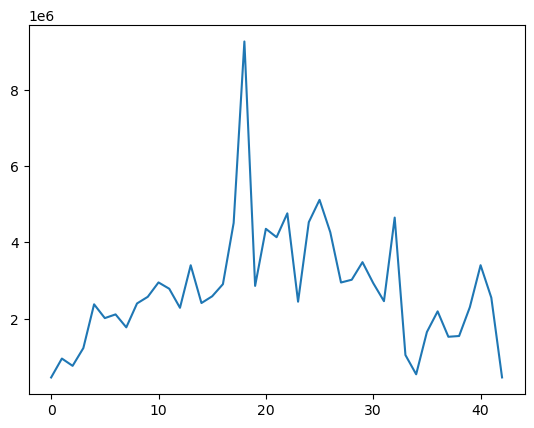

In [6]:
expenses = df_monthly['expenseAmount']
expenses.plot()

In [33]:
expenses = np.array(expenses).reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(expenses)

In [69]:
def df_to_X_y(df, window_size=4):
    df_as_np = df
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [70]:
WINDOW_SIZE = 4
X, y = df_to_X_y(scaled_data, WINDOW_SIZE)
X.shape, y.shape

((39, 4, 1, 1), (39, 1))

In [71]:
X

array([[[[0.        ]],

        [[0.05632673]],

        [[0.03461951]],

        [[0.08752563]]],


       [[[0.05632673]],

        [[0.03461951]],

        [[0.08752563]],

        [[0.21773555]]],


       [[[0.03461951]],

        [[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]]],


       [[[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]]],


       [[[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]]],


       [[[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]]],


       [[[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]]],


       [[[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]]],


       [[[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]],

        [[0.26411488]]],


       [[[0.24007387]],

        [[0.28288084]],

        [[0.26411488]],

       

In [72]:
y

array([[2.17735552e-01],
       [1.76701701e-01],
       [1.87742959e-01],
       [1.49225775e-01],
       [2.20324802e-01],
       [2.40073869e-01],
       [2.82880836e-01],
       [2.64114878e-01],
       [2.07374802e-01],
       [3.33984309e-01],
       [2.21543039e-01],
       [2.41653885e-01],
       [2.77690977e-01],
       [4.59971010e-01],
       [1.00000000e+00],
       [2.72581539e-01],
       [4.42436919e-01],
       [4.17469255e-01],
       [4.88470936e-01],
       [2.25547034e-01],
       [4.62265498e-01],
       [5.28673887e-01],
       [4.32347192e-01],
       [2.82657635e-01],
       [2.90907455e-01],
       [3.43207696e-01],
       [2.80898717e-01],
       [2.27097517e-01],
       [4.75867723e-01],
       [6.67786877e-02],
       [9.48464096e-03],
       [1.35312886e-01],
       [1.96792101e-01],
       [1.21142151e-01],
       [1.23425280e-01],
       [2.09232883e-01],
       [3.34137654e-01],
       [2.37465877e-01],
       [1.36419806e-04]])

In [85]:
X_train, y_train = X[:35], y[:35]
X_val, y_val = X[35:37], y[35:37]
X_test, y_test = X[37:], y[37:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((35, 4, 1, 1), (35, 1), (2, 4, 1, 1), (2, 1), (2, 4, 1, 1), (2, 1))

In [86]:
X_train

array([[[[0.        ]],

        [[0.05632673]],

        [[0.03461951]],

        [[0.08752563]]],


       [[[0.05632673]],

        [[0.03461951]],

        [[0.08752563]],

        [[0.21773555]]],


       [[[0.03461951]],

        [[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]]],


       [[[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]]],


       [[[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]]],


       [[[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]]],


       [[[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]]],


       [[[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]]],


       [[[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]],

        [[0.26411488]]],


       [[[0.24007387]],

        [[0.28288084]],

        [[0.26411488]],

       

In [87]:
y_train

array([[0.21773555],
       [0.1767017 ],
       [0.18774296],
       [0.14922578],
       [0.2203248 ],
       [0.24007387],
       [0.28288084],
       [0.26411488],
       [0.2073748 ],
       [0.33398431],
       [0.22154304],
       [0.24165389],
       [0.27769098],
       [0.45997101],
       [1.        ],
       [0.27258154],
       [0.44243692],
       [0.41746925],
       [0.48847094],
       [0.22554703],
       [0.4622655 ],
       [0.52867389],
       [0.43234719],
       [0.28265764],
       [0.29090746],
       [0.3432077 ],
       [0.28089872],
       [0.22709752],
       [0.47586772],
       [0.06677869],
       [0.00948464],
       [0.13531289],
       [0.1967921 ],
       [0.12114215],
       [0.12342528]])

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((4,1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
cp = ModelCheckpoint('Expenses Prediction Model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [90]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[cp])

Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 0.1263 - root_mean_squared_error: 0.3555INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 14s 9s/step - loss: 0.1263 - root_mean_squared_error: 0.3555 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2839
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1295 - root_mean_squared_error: 0.3598INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1245 - root_mean_squared_error: 0.3528 - val_loss: 0.0793 - val_root_mean_squared_error: 0.2817
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1259 - root_mean_squared_error: 0.3548INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1226 - root_mean_squared_error: 0.3502 - val_loss: 0.0785 - val_root_mean_squared_error: 0.2801
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1235 - root_mean_squared_error: 0.3515INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1209 - root_mean_squared_error: 0.3477 - val_loss: 0.0777 - val_root_mean_squared_error: 0.2787
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1197 - root_mean_squared_error: 0.3460INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1194 - root_mean_squared_error: 0.3456 - val_loss: 0.0769 - val_root_mean_squared_error: 0.2773
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1201 - root_mean_squared_error: 0.3465INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1181 - root_mean_squared_error: 0.3436 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2758
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1165 - root_mean_squared_error: 0.3414INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1168 - root_mean_squared_error: 0.3417 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2742
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1123 - root_mean_squared_error: 0.3351INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1155 - root_mean_squared_error: 0.3398 - val_loss: 0.0743 - val_root_mean_squared_error: 0.2726
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0880 - root_mean_squared_error: 0.2967INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1142 - root_mean_squared_error: 0.3379 - val_loss: 0.0734 - val_root_mean_squared_error: 0.2710
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0807 - root_mean_squared_error: 0.2841INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1129 - root_mean_squared_error: 0.3359 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2697
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1169 - root_mean_squared_error: 0.3420INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1116 - root_mean_squared_error: 0.3341 - val_loss: 0.0722 - val_root_mean_squared_error: 0.2688
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1195 - root_mean_squared_error: 0.3457INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1104 - root_mean_squared_error: 0.3323 - val_loss: 0.0720 - val_root_mean_squared_error: 0.2683
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1122 - root_mean_squared_error: 0.3350INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1092 - root_mean_squared_error: 0.3305 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2677
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1040 - root_mean_squared_error: 0.3224INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1082 - root_mean_squared_error: 0.3289 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2672
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1128 - root_mean_squared_error: 0.3359INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1074 - root_mean_squared_error: 0.3277 - val_loss: 0.0711 - val_root_mean_squared_error: 0.2667
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1070 - root_mean_squared_error: 0.3271INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1066 - root_mean_squared_error: 0.3265 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2661
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1097 - root_mean_squared_error: 0.3313INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1060 - root_mean_squared_error: 0.3255 - val_loss: 0.0705 - val_root_mean_squared_error: 0.2656
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1122 - root_mean_squared_error: 0.3350INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1054 - root_mean_squared_error: 0.3247 - val_loss: 0.0702 - val_root_mean_squared_error: 0.2650
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0768 - root_mean_squared_error: 0.2772INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1049 - root_mean_squared_error: 0.3239 - val_loss: 0.0699 - val_root_mean_squared_error: 0.2644
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1036 - root_mean_squared_error: 0.3219INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1045 - root_mean_squared_error: 0.3233 - val_loss: 0.0696 - val_root_mean_squared_error: 0.2638
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1072 - root_mean_squared_error: 0.3274INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1040 - root_mean_squared_error: 0.3225 - val_loss: 0.0693 - val_root_mean_squared_error: 0.2632
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1076 - root_mean_squared_error: 0.3280INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1036 - root_mean_squared_error: 0.3218 - val_loss: 0.0690 - val_root_mean_squared_error: 0.2626
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1062 - root_mean_squared_error: 0.3259INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1031 - root_mean_squared_error: 0.3211 - val_loss: 0.0687 - val_root_mean_squared_error: 0.2620
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1038 - root_mean_squared_error: 0.3222INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1027 - root_mean_squared_error: 0.3205 - val_loss: 0.0683 - val_root_mean_squared_error: 0.2614
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1034 - root_mean_squared_error: 0.3216INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1023 - root_mean_squared_error: 0.3198 - val_loss: 0.0680 - val_root_mean_squared_error: 0.2608
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1047 - root_mean_squared_error: 0.3236INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1018 - root_mean_squared_error: 0.3191 - val_loss: 0.0677 - val_root_mean_squared_error: 0.2601
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0979 - root_mean_squared_error: 0.3129INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.1014 - root_mean_squared_error: 0.3184 - val_loss: 0.0673 - val_root_mean_squared_error: 0.2595
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1090 - root_mean_squared_error: 0.3301INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1009 - root_mean_squared_error: 0.3177 - val_loss: 0.0670 - val_root_mean_squared_error: 0.2588
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0785 - root_mean_squared_error: 0.2802INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1004 - root_mean_squared_error: 0.3169 - val_loss: 0.0666 - val_root_mean_squared_error: 0.2582
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1006 - root_mean_squared_error: 0.3172INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.1000 - root_mean_squared_error: 0.3162 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2575
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0924 - root_mean_squared_error: 0.3039INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0995 - root_mean_squared_error: 0.3154 - val_loss: 0.0659 - val_root_mean_squared_error: 0.2568
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1034 - root_mean_squared_error: 0.3216INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0990 - root_mean_squared_error: 0.3146 - val_loss: 0.0656 - val_root_mean_squared_error: 0.2561
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1011 - root_mean_squared_error: 0.3180INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0985 - root_mean_squared_error: 0.3139 - val_loss: 0.0652 - val_root_mean_squared_error: 0.2554
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1029 - root_mean_squared_error: 0.3208INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0980 - root_mean_squared_error: 0.3131 - val_loss: 0.0649 - val_root_mean_squared_error: 0.2547
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1044 - root_mean_squared_error: 0.3230INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 10s 10s/step - loss: 0.0976 - root_mean_squared_error: 0.3123 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2540
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1037 - root_mean_squared_error: 0.3220INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0971 - root_mean_squared_error: 0.3116 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2534
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0975 - root_mean_squared_error: 0.3123INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0966 - root_mean_squared_error: 0.3109 - val_loss: 0.0639 - val_root_mean_squared_error: 0.2527
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1027 - root_mean_squared_error: 0.3205INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0962 - root_mean_squared_error: 0.3102 - val_loss: 0.0635 - val_root_mean_squared_error: 0.2521
Epoch 39/500
2/2 [==============================] - ETA: 0s - loss: 0.0958 - root_mean_squared_error: 0.3095INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0958 - root_mean_squared_error: 0.3095 - val_loss: 0.0632 - val_root_mean_squared_error: 0.2514
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0960 - root_mean_squared_error: 0.3098INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0953 - root_mean_squared_error: 0.3087 - val_loss: 0.0629 - val_root_mean_squared_error: 0.2508
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1008 - root_mean_squared_error: 0.3175INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0949 - root_mean_squared_error: 0.3080 - val_loss: 0.0625 - val_root_mean_squared_error: 0.2501
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0986 - root_mean_squared_error: 0.3140INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0944 - root_mean_squared_error: 0.3073 - val_loss: 0.0622 - val_root_mean_squared_error: 0.2494
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0998 - root_mean_squared_error: 0.3160INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0940 - root_mean_squared_error: 0.3066 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2487
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0921 - root_mean_squared_error: 0.3035INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0935 - root_mean_squared_error: 0.3058 - val_loss: 0.0615 - val_root_mean_squared_error: 0.2481
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0675 - root_mean_squared_error: 0.2599INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0931 - root_mean_squared_error: 0.3051 - val_loss: 0.0612 - val_root_mean_squared_error: 0.2473
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0982 - root_mean_squared_error: 0.3134INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0926 - root_mean_squared_error: 0.3043 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2466
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0890 - root_mean_squared_error: 0.2984INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0921 - root_mean_squared_error: 0.3035 - val_loss: 0.0604 - val_root_mean_squared_error: 0.2459
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0953 - root_mean_squared_error: 0.3088INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0916 - root_mean_squared_error: 0.3027 - val_loss: 0.0601 - val_root_mean_squared_error: 0.2451
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0923 - root_mean_squared_error: 0.3038INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0911 - root_mean_squared_error: 0.3019 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2443
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0954 - root_mean_squared_error: 0.3089INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0906 - root_mean_squared_error: 0.3011 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2436
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0979 - root_mean_squared_error: 0.3129INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0902 - root_mean_squared_error: 0.3003 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2429
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0946 - root_mean_squared_error: 0.3075INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0897 - root_mean_squared_error: 0.2995 - val_loss: 0.0587 - val_root_mean_squared_error: 0.2422
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0914 - root_mean_squared_error: 0.3024INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0892 - root_mean_squared_error: 0.2987 - val_loss: 0.0583 - val_root_mean_squared_error: 0.2415
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0663 - root_mean_squared_error: 0.2574INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0887 - root_mean_squared_error: 0.2979 - val_loss: 0.0580 - val_root_mean_squared_error: 0.2407
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0886 - root_mean_squared_error: 0.2977INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0883 - root_mean_squared_error: 0.2971 - val_loss: 0.0576 - val_root_mean_squared_error: 0.2400
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0862 - root_mean_squared_error: 0.2936INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0878 - root_mean_squared_error: 0.2962 - val_loss: 0.0572 - val_root_mean_squared_error: 0.2392
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0866 - root_mean_squared_error: 0.2943INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0872 - root_mean_squared_error: 0.2954 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2383
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0840 - root_mean_squared_error: 0.2899INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0867 - root_mean_squared_error: 0.2945 - val_loss: 0.0564 - val_root_mean_squared_error: 0.2375
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0853 - root_mean_squared_error: 0.2921INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0862 - root_mean_squared_error: 0.2935 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2366
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0894 - root_mean_squared_error: 0.2990INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0856 - root_mean_squared_error: 0.2926 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2358
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0886 - root_mean_squared_error: 0.2977INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0851 - root_mean_squared_error: 0.2917 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0883 - root_mean_squared_error: 0.2972INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0845 - root_mean_squared_error: 0.2908 - val_loss: 0.0548 - val_root_mean_squared_error: 0.2341
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0553 - root_mean_squared_error: 0.2351INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0840 - root_mean_squared_error: 0.2898 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2332
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0836 - root_mean_squared_error: 0.2891INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0835 - root_mean_squared_error: 0.2889 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2323
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0848 - root_mean_squared_error: 0.2912INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0829 - root_mean_squared_error: 0.2879 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2314
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0797 - root_mean_squared_error: 0.2823INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0823 - root_mean_squared_error: 0.2869 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2305
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0798 - root_mean_squared_error: 0.2824INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 11s 11s/step - loss: 0.0817 - root_mean_squared_error: 0.2859 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2296
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0867 - root_mean_squared_error: 0.2945INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0812 - root_mean_squared_error: 0.2849 - val_loss: 0.0523 - val_root_mean_squared_error: 0.2287
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0853 - root_mean_squared_error: 0.2921INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0806 - root_mean_squared_error: 0.2839 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2278
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0853 - root_mean_squared_error: 0.2920INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0801 - root_mean_squared_error: 0.2830 - val_loss: 0.0515 - val_root_mean_squared_error: 0.2270
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0783 - root_mean_squared_error: 0.2798INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0795 - root_mean_squared_error: 0.2820 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2261
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0834 - root_mean_squared_error: 0.2888INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0790 - root_mean_squared_error: 0.2811 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2252
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0774 - root_mean_squared_error: 0.2781INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0785 - root_mean_squared_error: 0.2801 - val_loss: 0.0503 - val_root_mean_squared_error: 0.2244
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0832 - root_mean_squared_error: 0.2884INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0780 - root_mean_squared_error: 0.2792 - val_loss: 0.0499 - val_root_mean_squared_error: 0.2235
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0807 - root_mean_squared_error: 0.2841INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0774 - root_mean_squared_error: 0.2782 - val_loss: 0.0496 - val_root_mean_squared_error: 0.2226
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0550 - root_mean_squared_error: 0.2345INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0769 - root_mean_squared_error: 0.2773 - val_loss: 0.0491 - val_root_mean_squared_error: 0.2217
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0521 - root_mean_squared_error: 0.2283INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0763 - root_mean_squared_error: 0.2763 - val_loss: 0.0487 - val_root_mean_squared_error: 0.2207
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0794 - root_mean_squared_error: 0.2818INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0758 - root_mean_squared_error: 0.2753 - val_loss: 0.0483 - val_root_mean_squared_error: 0.2197
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0744 - root_mean_squared_error: 0.2728INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0752 - root_mean_squared_error: 0.2741 - val_loss: 0.0478 - val_root_mean_squared_error: 0.2186
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0741 - root_mean_squared_error: 0.2722INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0746 - root_mean_squared_error: 0.2730 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2176
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0788 - root_mean_squared_error: 0.2807INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0740 - root_mean_squared_error: 0.2720 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0743 - root_mean_squared_error: 0.2726INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0733 - root_mean_squared_error: 0.2708 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2156
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0763 - root_mean_squared_error: 0.2763INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0728 - root_mean_squared_error: 0.2698 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2146
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0744 - root_mean_squared_error: 0.2727INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0722 - root_mean_squared_error: 0.2687 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2136
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0769 - root_mean_squared_error: 0.2773INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.0452 - val_root_mean_squared_error: 0.2127
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0757 - root_mean_squared_error: 0.2751INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0711 - root_mean_squared_error: 0.2666 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2117
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0715 - root_mean_squared_error: 0.2673INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0705 - root_mean_squared_error: 0.2656 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2108
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0721 - root_mean_squared_error: 0.2686INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0700 - root_mean_squared_error: 0.2646 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0730 - root_mean_squared_error: 0.2701INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0695 - root_mean_squared_error: 0.2636 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2089
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0735 - root_mean_squared_error: 0.2712INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0689 - root_mean_squared_error: 0.2626 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2080
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0705 - root_mean_squared_error: 0.2655INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0684 - root_mean_squared_error: 0.2616 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2071
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0719 - root_mean_squared_error: 0.2682INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0679 - root_mean_squared_error: 0.2606 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2061
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0437 - root_mean_squared_error: 0.2090INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0674 - root_mean_squared_error: 0.2596 - val_loss: 0.0421 - val_root_mean_squared_error: 0.2052
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2664INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0669 - root_mean_squared_error: 0.2586 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2041
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0677 - root_mean_squared_error: 0.2603INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0663 - root_mean_squared_error: 0.2575 - val_loss: 0.0412 - val_root_mean_squared_error: 0.2031
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2664INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0658 - root_mean_squared_error: 0.2564 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2021
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0704 - root_mean_squared_error: 0.2654INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0652 - root_mean_squared_error: 0.2554 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0689 - root_mean_squared_error: 0.2625INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2001
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0649 - root_mean_squared_error: 0.2548INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0642 - root_mean_squared_error: 0.2533 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1992
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0635 - root_mean_squared_error: 0.2520INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0637 - root_mean_squared_error: 0.2523 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1981
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0657 - root_mean_squared_error: 0.2564INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0631 - root_mean_squared_error: 0.2512 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1971
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0655 - root_mean_squared_error: 0.2558INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0626 - root_mean_squared_error: 0.2502 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1960
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0666 - root_mean_squared_error: 0.2580INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0620 - root_mean_squared_error: 0.2491 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1950
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0631 - root_mean_squared_error: 0.2512INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0615 - root_mean_squared_error: 0.2480 - val_loss: 0.0376 - val_root_mean_squared_error: 0.1939
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0602 - root_mean_squared_error: 0.2453INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0609 - root_mean_squared_error: 0.2469 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1928
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0615 - root_mean_squared_error: 0.2481INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0604 - root_mean_squared_error: 0.2457 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1916
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0621 - root_mean_squared_error: 0.2493INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0598 - root_mean_squared_error: 0.2445 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0594 - root_mean_squared_error: 0.2436INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0592 - root_mean_squared_error: 0.2433 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1893
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0566 - root_mean_squared_error: 0.2379INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0586 - root_mean_squared_error: 0.2420 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1880
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0579 - root_mean_squared_error: 0.2406INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0580 - root_mean_squared_error: 0.2408 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1868
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0617 - root_mean_squared_error: 0.2483INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0574 - root_mean_squared_error: 0.2395 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1855
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0609 - root_mean_squared_error: 0.2467INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1842
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0561 - root_mean_squared_error: 0.2368INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0561 - root_mean_squared_error: 0.2369 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1830
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0566 - root_mean_squared_error: 0.2380INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0555 - root_mean_squared_error: 0.2357 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1818
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0546 - root_mean_squared_error: 0.2336INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0549 - root_mean_squared_error: 0.2344 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1805
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0584 - root_mean_squared_error: 0.2417INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0544 - root_mean_squared_error: 0.2332 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1792
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0529 - root_mean_squared_error: 0.2301INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0538 - root_mean_squared_error: 0.2319 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1779
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1842INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0532 - root_mean_squared_error: 0.2306 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0514 - root_mean_squared_error: 0.2268INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0525 - root_mean_squared_error: 0.2292 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1748
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0514 - root_mean_squared_error: 0.2267INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0519 - root_mean_squared_error: 0.2278 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1731
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0557 - root_mean_squared_error: 0.2361INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0513 - root_mean_squared_error: 0.2264 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1714
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0526 - root_mean_squared_error: 0.2292INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0506 - root_mean_squared_error: 0.2249 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1698
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0511 - root_mean_squared_error: 0.2260INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0500 - root_mean_squared_error: 0.2235 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0516 - root_mean_squared_error: 0.2272INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0493 - root_mean_squared_error: 0.2221 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0518 - root_mean_squared_error: 0.2275INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0487 - root_mean_squared_error: 0.2207 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1649
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2208INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0481 - root_mean_squared_error: 0.2193 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1632
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0480 - root_mean_squared_error: 0.2191INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0474 - root_mean_squared_error: 0.2178 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1614
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0481 - root_mean_squared_error: 0.2192INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0467 - root_mean_squared_error: 0.2161 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1595
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0463 - root_mean_squared_error: 0.2153INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0460 - root_mean_squared_error: 0.2144 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1576
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0483 - root_mean_squared_error: 0.2199INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0452 - root_mean_squared_error: 0.2126 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0468 - root_mean_squared_error: 0.2164INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0445 - root_mean_squared_error: 0.2110 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1540
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2084INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0437 - root_mean_squared_error: 0.2091 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0464 - root_mean_squared_error: 0.2155INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1502
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0460 - root_mean_squared_error: 0.2144INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0424 - root_mean_squared_error: 0.2058 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0452 - root_mean_squared_error: 0.2125INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0417 - root_mean_squared_error: 0.2042 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1467
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0400 - root_mean_squared_error: 0.2000INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0410 - root_mean_squared_error: 0.2025 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0420 - root_mean_squared_error: 0.2050INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0404 - root_mean_squared_error: 0.2009 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1430
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0402 - root_mean_squared_error: 0.2005INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0397 - root_mean_squared_error: 0.1992 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1411
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0411 - root_mean_squared_error: 0.2028INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0390 - root_mean_squared_error: 0.1975 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1391
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0411 - root_mean_squared_error: 0.2028INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0384 - root_mean_squared_error: 0.1959 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1408INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0377 - root_mean_squared_error: 0.1941 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1353
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0403 - root_mean_squared_error: 0.2006INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0371 - root_mean_squared_error: 0.1927 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1334
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0368 - root_mean_squared_error: 0.1919INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0365 - root_mean_squared_error: 0.1911 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0391 - root_mean_squared_error: 0.1978INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0359 - root_mean_squared_error: 0.1896 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1298
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1865INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0354 - root_mean_squared_error: 0.1881 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1282
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0371 - root_mean_squared_error: 0.1927INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0349 - root_mean_squared_error: 0.1868 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1267
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0358 - root_mean_squared_error: 0.1893INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0344 - root_mean_squared_error: 0.1855 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1251
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0362 - root_mean_squared_error: 0.1904INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0340 - root_mean_squared_error: 0.1843 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1235
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0363 - root_mean_squared_error: 0.1905INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0335 - root_mean_squared_error: 0.1831 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1221
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0355 - root_mean_squared_error: 0.1883INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0332 - root_mean_squared_error: 0.1821 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0351 - root_mean_squared_error: 0.1873INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0328 - root_mean_squared_error: 0.1811 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1195
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0351 - root_mean_squared_error: 0.1873INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0324 - root_mean_squared_error: 0.1801 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1182
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1851INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0321 - root_mean_squared_error: 0.1792 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1168
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0325 - root_mean_squared_error: 0.1802INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0317 - root_mean_squared_error: 0.1781 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1842INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1121INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0310 - root_mean_squared_error: 0.1759 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0334 - root_mean_squared_error: 0.1828INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0306 - root_mean_squared_error: 0.1750 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0308 - root_mean_squared_error: 0.1754INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0302 - root_mean_squared_error: 0.1737 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1090
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311 - root_mean_squared_error: 0.1762INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0298 - root_mean_squared_error: 0.1728 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1696INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0295 - root_mean_squared_error: 0.1717 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0319 - root_mean_squared_error: 0.1785INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0292 - root_mean_squared_error: 0.1708 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1048
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0294 - root_mean_squared_error: 0.1716INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0289 - root_mean_squared_error: 0.1701 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1036
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1125INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0286 - root_mean_squared_error: 0.1693 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1076INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0306 - root_mean_squared_error: 0.1749INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0281 - root_mean_squared_error: 0.1675 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1723INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0277 - root_mean_squared_error: 0.1665 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0973
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0293 - root_mean_squared_error: 0.1710INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0274 - root_mean_squared_error: 0.1657 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.1621INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0945
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0291 - root_mean_squared_error: 0.1706INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0270 - root_mean_squared_error: 0.1642 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0936
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0997INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0267 - root_mean_squared_error: 0.1635 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0288 - root_mean_squared_error: 0.1698INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0266 - root_mean_squared_error: 0.1630 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0271 - root_mean_squared_error: 0.1645INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0263 - root_mean_squared_error: 0.1623 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0895
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - root_mean_squared_error: 0.1688INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0262 - root_mean_squared_error: 0.1617 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1606INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1651INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0258 - root_mean_squared_error: 0.1607 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.1666INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0257 - root_mean_squared_error: 0.1604 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1605INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0256 - root_mean_squared_error: 0.1601 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0277 - root_mean_squared_error: 0.1665INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0255 - root_mean_squared_error: 0.1598 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1648INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0254 - root_mean_squared_error: 0.1595 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0835
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1611INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0254 - root_mean_squared_error: 0.1593 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0829
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.1621INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0253 - root_mean_squared_error: 0.1591 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1653INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 7s/step - loss: 0.0253 - root_mean_squared_error: 0.1589 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1655INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0252 - root_mean_squared_error: 0.1588 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0810
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0259 - root_mean_squared_error: 0.1611INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 7s/step - loss: 0.0252 - root_mean_squared_error: 0.1586 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.1621INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0251 - root_mean_squared_error: 0.1584 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0803
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1649INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 8s/step - loss: 0.0251 - root_mean_squared_error: 0.1583 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 187/500
2/2 [==============================] - ETA: 0s - loss: 0.0250 - root_mean_squared_error: 0.1581INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0250 - root_mean_squared_error: 0.1581 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.1643INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0250 - root_mean_squared_error: 0.1580 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0795
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0249 - root_mean_squared_error: 0.1576INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0249 - root_mean_squared_error: 0.1578 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0789
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1001INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0779
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0259 - root_mean_squared_error: 0.1608INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0768
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1626INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0247 - root_mean_squared_error: 0.1572 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.1023INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0246 - root_mean_squared_error: 0.1570 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0257 - root_mean_squared_error: 0.1603INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0246 - root_mean_squared_error: 0.1569 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1626INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0246 - root_mean_squared_error: 0.1568 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0267 - root_mean_squared_error: 0.1633INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0245 - root_mean_squared_error: 0.1566 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0261 - root_mean_squared_error: 0.1617INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0245 - root_mean_squared_error: 0.1566 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.1629INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 199/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 200/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 201/500
2/2 [==============================] - 0s 87ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0729
Epoch 202/500
2/2 [==============================] - 0s 77ms/step - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
Epoch 203/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0055 - val_root_mean_square

INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 6s/step - loss: 0.0244 - root_mean_squared_error: 0.1563 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1625INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0244 - root_mean_squared_error: 0.1563 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0255 - root_mean_squared_error: 0.1597INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0711
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1038INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.1027INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.1601INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1626INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0262 - root_mean_squared_error: 0.1619INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 219/500
2/2 [==============================] - 0s 82ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 220/500
2/2 [==============================] - 0s 85ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0689
Epoch 221/500
2/2 [==============================] - 0s 77ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 222/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
Epoch 223/500
2/2 [==============================] - 0s 129ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0049 - val_root_mean_squar

Epoch 266/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0768
Epoch 267/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0759
Epoch 268/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 269/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0243 - root_mean_squared_error: 0.1558 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 270/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0242 - root_mean_squared_error: 0.1557 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 271/500
2/2 [==============================] - 0s 73ms/step - loss: 0.0243 - root_mean_squared_error: 0.1557 - val_loss: 0.0052 - val_

INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.1627INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 310/500
2/2 [==============================] - 0s 89ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 311/500
2/2 [==============================] - 0s 67ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 312/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 313/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690
Epoch 314/500
2/2 [==============================] - 0s 82ms/step - loss: 0.0243 - root_mean_squared_error: 0.1559 - val_loss: 0.0048 - val_root_mean_square

Epoch 357/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0241 - root_mean_squared_error: 0.1553 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 358/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 359/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 360/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 361/500
2/2 [==============================] - 0s 73ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 362/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0050 - val_

2/2 [==============================] - 0s 83ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 405/500
2/2 [==============================] - 0s 85ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 406/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 407/500
2/2 [==============================] - 0s 86ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0743
Epoch 408/500
2/2 [==============================] - 0s 72ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0731
Epoch 409/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0052 - val_root_mean_squa

Epoch 452/500
2/2 [==============================] - 0s 87ms/step - loss: 0.0240 - root_mean_squared_error: 0.1551 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 453/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0711
Epoch 454/500
2/2 [==============================] - 0s 84ms/step - loss: 0.0241 - root_mean_squared_error: 0.1553 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 455/500
2/2 [==============================] - 0s 71ms/step - loss: 0.0241 - root_mean_squared_error: 0.1553 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 456/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0241 - root_mean_squared_error: 0.1553 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 457/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0241 - root_mean_squared_error: 0.1553 - val_loss: 0.0051 - val_

2/2 [==============================] - 0s 73ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 500/500
2/2 [==============================] - 0s 69ms/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688


In [91]:
from tensorflow.keras.models import load_model
model = load_model('Expenses Prediction Model/')

In [92]:
train_predictions = model.predict(X_train)
predictions = scaler.inverse_transform(train_predictions).flatten()
train_target = scaler.inverse_transform(y_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': predictions, 'Actuals':train_target})
train_results

2/2 [==============================] - 1s 17ms/step


,Train Predictions,Actuals
0,2043683.625,2379730.0
1,2245523.000,2018480.0
2,2374334.750,2115684.0
3,2577118.000,1776590.0
4,2690966.000,2402525.0
5,2665198.000,2576390.0
6,2716244.750,2953250.0
7,2797352.000,2788040.0
8,2958114.000,2288517.0
9,2984686.500,3403150.0


In [93]:
val_predictions = model.predict(X_val)
val_results = scaler.inverse_transform(val_predictions).flatten()
val_target = scaler.inverse_transform(y_val).flatten()
validation_results = pd.DataFrame(data={'Validation Predictions': val_results, 'Actuals':val_target})
validation_results

1/1 [==============================] - 0s 47ms/step


,Validation Predictions,Actuals
0,2509847.50,2304875.0
1,2575562.75,3404500.0


In [94]:
test_predictions = model.predict(X_test)
test_results = scaler.inverse_transform(test_predictions).flatten()
test_target = scaler.inverse_transform(y_test).flatten()
test_results = pd.DataFrame(data={'Validation Predictions': test_results, 'Actuals': test_target})
test_results

1/1 [==============================] - 0s 35ms/step


,Validation Predictions,Actuals
0,2639681.5,2553430.0
1,2806800.5,464051.0


In [103]:
predict = model.predict(X_test)
predict

1/1 [==============================] - 0s 47ms/step


array([[0.15451737],
       [0.15331261],
       [0.1517272 ],
       [0.15403514]], dtype=float32)